In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [116]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D
from keras.models import Sequential
import os
from sklearn.ensemble import RandomForestRegressor
import cv2
import keras as K
from os import listdir
from os.path import isfile, join

from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model



In [117]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

# I. dataset de variables numériques et catégorielles

## concaténation des dataframe

In [118]:
import pandas as pd
clinical_train = pd.read_csv("inputs/features/clinical_data.csv")
radiomics_train = pd.read_csv("inputs/features/radiomics.csv")
outputs=pd.read_csv("y_train.csv")
outputs

,PatientID,SurvivalTime,Event
0,202,1378,0
1,371,379,1
2,246,573,1
3,240,959,0
4,284,2119,0
...,...,...,...
295,261,1540,0
296,298,946,0
297,129,559,0
298,273,1952,0


In [119]:
y=outputs['SurvivalTime']
y

0      1378
1       379
2       573
3       959
4      2119
       ... 
295    1540
296     946
297     559
298    1952
299     858
Name: SurvivalTime, Length: 300, dtype: int64

In [120]:
radiomics_train=radiomics_train.iloc[2:,:].rename(columns={'Unnamed: 0': 'PatientID'})
radiomics_train

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,firstorder.1,firstorder.2,firstorder.3,firstorder.4,firstorder.5,firstorder.6,firstorder.7,firstorder.8,firstorder.9,firstorder.10,firstorder.11,firstorder.12,firstorder.13,textural,textural.1,textural.2,textural.3,textural.4,textural.5,textural.6,textural.7,textural.8,textural.9,textural.10,textural.11,textural.12,textural.13,textural.14,textural.15,textural.16,textural.17,textural.18,textural.19,textural.20,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30
2,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,5.138062382118321,1.592466352650529,241.0,-310.85803093096126,288.3111051364939,-266.0,-1006.0,1247.0,446.40731943466136,-0.28171362715369264,320.385360855588,0.037008423161283735,102646.77945056533,1056.8435055137238,546253.4997623835,-5334.563631480078,555.8184549870228,54.33681602410259,0.8211014877081448,3.8453834028138583,5.036775448515044,0.005919558920335507,9.270194161558065,0.33867187217563377,0.2627800905967253,-0.17518491008145037,0.9015247439549889,0.9810530030051026,0.917508997533415,0.24941641472261214,0.03776846445132,61.03566173896069,6.007130447529095,0.92639139491901,1.4579804820599591,555.3785937091678,14592.30372702833,0.8913295337029291,0.003561530161295479,954.7491354587909,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885
3,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,4.461053722332744,3.3710133242706672,262.0,-134.4298091178651,191.39515446804003,-15.0,-945.0,1207.0,268.9659999635592,-1.2160624349751639,232.96209038582157,0.08006130804274754,54271.3355569317,1219.6891076375578,331155.23039603705,-6857.579703567763,295.032309126843,16.86878061074089,0.8911837989502003,2.9840342694043587,2.570016664609916,0.02553211184702079,7.551167524390386,0.49571931312929346,0.43987865336946513,-0.2503697644867232,0.932847041118953,0.9932818146302579,0.9534642579833031,0.3400237904182307,0.11057462137028176,67.82680408866037,5.255594250643582,0.8551540413630085,2.5121246601768097,1766.6193730958223,22881.93268598017,0.7660321748303586,0.002246203831804831,1092.8237238353574,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547
4,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,3.437110589654181,7.585494418008486,115.0,-54.136093438419906,94.1321357821617,2.0,-785.0,900.0,141.85279510151446,-2.153343711307309,131.11635620828895,0.1609050014904606,17191.498865338912,972.4657979251455,54523.086866816026,-1618.3631183474013,78.18396970261281,7.040623243584665,0.8310813154695125,2.3339387067512645,1.496020435703838,0.06656941447974507,5.686553623846815,0.6166070089441351,0.5814584268090807,-0.2499694994134808,0.8849109526553268,0.995095361848478,0.963886934292663,0.37995703858664154,0.18972279251513116,61.79514402582132,4.159019266925874,0.7692649184668129,4.096837887896892,3462.816343789217,18773.106002343673,0.6445541733928403,0.0018803220646738058,878.9896008279054,0.0016345955500716887,634.9100359203011,0.00486911711499068,4232.41808034498
5,240,0.026811108023238883,0.2554063972936345,46.8187996428785,1.5761204705010834,0.634469267239501,4221.412123045331,0.3238779820439811,13074.0,658332446.0,4.3525641618756525,4.281864726686089,274.0,-118.70552241089185,149.07299773153227,-37.0,-850.0,1124.0,224.39769400032455,-1.4378362258836557,190.42931502744148,0.07447606052451713,36263.32402182055,968.1175668991668,166735.7799937764,-3968.921513772283,184.2995907319699,13.656781666089454,0.8600960249748673,2.9267914530957833,2.492078883397961,0.015048432154693049,7.5361614677447095,0.457544637650

In [121]:
radiomics_train['PatientID']=radiomics_train['PatientID'].astype(np.int64)


In [122]:
df_train=pd.merge(radiomics_train,clinical_train, on='PatientID', how='inner')
df_train


,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,firstorder.1,firstorder.2,firstorder.3,firstorder.4,firstorder.5,firstorder.6,firstorder.7,firstorder.8,firstorder.9,firstorder.10,firstorder.11,firstorder.12,firstorder.13,textural,textural.1,textural.2,textural.3,textural.4,textural.5,textural.6,textural.7,textural.8,textural.9,textural.10,textural.11,textural.12,textural.13,textural.14,textural.15,textural.16,textural.17,textural.18,textural.19,textural.20,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,5.138062382118321,1.592466352650529,241.0,-310.85803093096126,288.3111051364939,-266.0,-1006.0,1247.0,446.40731943466136,-0.28171362715369264,320.385360855588,0.037008423161283735,102646.77945056533,1056.8435055137238,546253.4997623835,-5334.563631480078,555.8184549870228,54.33681602410259,0.8211014877081448,3.8453834028138583,5.036775448515044,0.005919558920335507,9.270194161558065,0.33867187217563377,0.2627800905967253,-0.17518491008145037,0.9015247439549889,0.9810530030051026,0.917508997533415,0.24941641472261214,0.03776846445132,61.03566173896069,6.007130447529095,0.92639139491901,1.4579804820599591,555.3785937091678,14592.30372702833,0.8913295337029291,0.003561530161295479,954.7491354587909,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885,Adenocarcinoma,0,0,l2,2,66.0000
1,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,4.461053722332744,3.3710133242706672,262.0,-134.4298091178651,191.39515446804003,-15.0,-945.0,1207.0,268.9659999635592,-1.2160624349751639,232.96209038582157,0.08006130804274754,54271.3355569317,1219.6891076375578,331155.23039603705,-6857.579703567763,295.032309126843,16.86878061074089,0.8911837989502003,2.9840342694043587,2.570016664609916,0.02553211184702079,7.551167524390386,0.49571931312929346,0.43987865336946513,-0.2503697644867232,0.932847041118953,0.9932818146302579,0.9534642579833031,0.3400237904182307,0.11057462137028176,67.82680408866037,5.255594250643582,0.8551540413630085,2.5121246601768097,1766.6193730958223,22881.93268598017,0.7660321748303586,0.002246203831804831,1092.8237238353574,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547,large cell,0,2,l1,4,64.5722
2,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,3.437110589654181,7.585494418008486,115.0,-54.136093438419906,94.1321357821617,2.0,-785.0,900.0,141.85279510151446,-2.153343711307309,131.11635620828895,0.1609050014904606,17191.498865338912,972.4657979251455,54523.086866816026,-1618.3631183474013,78.18396970261281,7.040623243584665,0.8310813154695125,2.3339387067512645,1.496020435703838,0.06656941447974507,5.686553623846815,0.6166070089441351,0.5814584268090807,-0.2499694994134808,0.8849109526553268,0.995095361848478,0.963886934292663,0.37995703858664154,0.18972279251513116,61.79514402582132,4.159019266925874,0.7692649184668129,4.096837887896892,3462.816343789217,18773.106002343673,0.6445541733928403,0.0018803220646738058,878.9896008279054,0.0016345955500716887,634.9100359203011,0.00486911711499068,4232.41808034498,squamous cell carcinoma,0,3,l1,2,66.0452
3,240,0.026811108023238883,0.2554063972936345,46.8187996428785,1.5761204705010834,0.634469267239501,4221.412123045331,0.3238779820439811,13074.0,658332446.0,4.3525641618756525,4.281864726686089,274.0,-118.70552241089185,149.07299773153227,-37.0,-850.0,1124.0,224.39769400032455,-1.4378362258836557,190.42931502744148,0.07447606052451713,36263.32402182055,968.1175668991668,166735.7799937764,-3968.9215137722

In [123]:
df_train.isna().sum()

PatientID         0
shape             0
shape.1           0
shape.2           0
shape.3           0
shape.4           0
shape.5           0
shape.6           0
shape.7           0
firstorder        0
firstorder.1      0
firstorder.2      0
firstorder.3      0
firstorder.4      0
firstorder.5      0
firstorder.6      0
firstorder.7      0
firstorder.8      0
firstorder.9      0
firstorder.10     0
firstorder.11     0
firstorder.12     0
firstorder.13     0
textural          0
textural.1        0
textural.2        0
textural.3        0
textural.4        0
textural.5        0
textural.6        0
textural.7        0
textural.8        0
textural.9        0
textural.10       0
textural.11       0
textural.12       0
textural.13       0
textural.14       0
textural.15       0
textural.16       0
textural.17       0
textural.18       0
textural.19       0
textural.20       0
textural.21       0
textural.22       0
textural.23       0
textural.24       0
textural.25       0
textural.26       0


In [124]:
df_train['Histology']=df_train['Histology'].fillna(df_train['Histology'].mode()[0])
df_train['age']=clinical_train['age'].fillna(df_train['age'].mean())
df_train

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,firstorder.1,firstorder.2,firstorder.3,firstorder.4,firstorder.5,firstorder.6,firstorder.7,firstorder.8,firstorder.9,firstorder.10,firstorder.11,firstorder.12,firstorder.13,textural,textural.1,textural.2,textural.3,textural.4,textural.5,textural.6,textural.7,textural.8,textural.9,textural.10,textural.11,textural.12,textural.13,textural.14,textural.15,textural.16,textural.17,textural.18,textural.19,textural.20,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,5.138062382118321,1.592466352650529,241.0,-310.85803093096126,288.3111051364939,-266.0,-1006.0,1247.0,446.40731943466136,-0.28171362715369264,320.385360855588,0.037008423161283735,102646.77945056533,1056.8435055137238,546253.4997623835,-5334.563631480078,555.8184549870228,54.33681602410259,0.8211014877081448,3.8453834028138583,5.036775448515044,0.005919558920335507,9.270194161558065,0.33867187217563377,0.2627800905967253,-0.17518491008145037,0.9015247439549889,0.9810530030051026,0.917508997533415,0.24941641472261214,0.03776846445132,61.03566173896069,6.007130447529095,0.92639139491901,1.4579804820599591,555.3785937091678,14592.30372702833,0.8913295337029291,0.003561530161295479,954.7491354587909,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885,Adenocarcinoma,0,0,l2,2,66.000000
1,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,4.461053722332744,3.3710133242706672,262.0,-134.4298091178651,191.39515446804003,-15.0,-945.0,1207.0,268.9659999635592,-1.2160624349751639,232.96209038582157,0.08006130804274754,54271.3355569317,1219.6891076375578,331155.23039603705,-6857.579703567763,295.032309126843,16.86878061074089,0.8911837989502003,2.9840342694043587,2.570016664609916,0.02553211184702079,7.551167524390386,0.49571931312929346,0.43987865336946513,-0.2503697644867232,0.932847041118953,0.9932818146302579,0.9534642579833031,0.3400237904182307,0.11057462137028176,67.82680408866037,5.255594250643582,0.8551540413630085,2.5121246601768097,1766.6193730958223,22881.93268598017,0.7660321748303586,0.002246203831804831,1092.8237238353574,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547,large cell,0,2,l1,4,64.572200
2,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,3.437110589654181,7.585494418008486,115.0,-54.136093438419906,94.1321357821617,2.0,-785.0,900.0,141.85279510151446,-2.153343711307309,131.11635620828895,0.1609050014904606,17191.498865338912,972.4657979251455,54523.086866816026,-1618.3631183474013,78.18396970261281,7.040623243584665,0.8310813154695125,2.3339387067512645,1.496020435703838,0.06656941447974507,5.686553623846815,0.6166070089441351,0.5814584268090807,-0.2499694994134808,0.8849109526553268,0.995095361848478,0.963886934292663,0.37995703858664154,0.18972279251513116,61.79514402582132,4.159019266925874,0.7692649184668129,4.096837887896892,3462.816343789217,18773.106002343673,0.6445541733928403,0.0018803220646738058,878.9896008279054,0.0016345955500716887,634.9100359203011,0.00486911711499068,4232.41808034498,squamous cell carcinoma,0,3,l1,2,66.045200
3,240,0.026811108023238883,0.2554063972936345,46.8187996428785,1.5761204705010834,0.634469267239501,4221.412123045331,0.3238779820439811,13074.0,658332446.0,4.3525641618756525,4.281864726686089,274.0,-118.70552241089185,149.07299773153227,-37.0,-850.0,1124.0,224.39769400032455,-1.4378362258836557,190.42931502744148,0.07447606052451713,36263.32402182055,968.1175668991668,166735.7799937764,-3968.9215

In [125]:
df_train.iloc[:, 54]

0               Adenocarcinoma
1                   large cell
2      squamous cell carcinoma
3                          nos
4      squamous cell carcinoma
                ...           
295    squamous cell carcinoma
296    squamous cell carcinoma
297                 large cell
298             Adenocarcinoma
299                 large cell
Name: Histology, Length: 300, dtype: object

In [126]:
#df_train = df_train.drop(PatientID, axis=1)

In [127]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
df_train.iloc[:, 57] = labelencoder_x.fit_transform(df_train.iloc[:, 57]) #applying histology
df_train.head()

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,firstorder.1,firstorder.2,firstorder.3,firstorder.4,firstorder.5,firstorder.6,firstorder.7,firstorder.8,firstorder.9,firstorder.10,firstorder.11,firstorder.12,firstorder.13,textural,textural.1,textural.2,textural.3,textural.4,textural.5,textural.6,textural.7,textural.8,textural.9,textural.10,textural.11,textural.12,textural.13,textural.14,textural.15,textural.16,textural.17,textural.18,textural.19,textural.20,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,5.138062382118321,1.592466352650529,241.0,-310.85803093096126,288.3111051364939,-266.0,-1006.0,1247.0,446.40731943466136,-0.28171362715369264,320.385360855588,0.037008423161283735,102646.77945056533,1056.8435055137238,546253.4997623835,-5334.563631480078,555.8184549870228,54.33681602410259,0.8211014877081448,3.8453834028138583,5.036775448515044,0.005919558920335507,9.270194161558065,0.33867187217563377,0.2627800905967253,-0.17518491008145037,0.9015247439549889,0.9810530030051026,0.917508997533415,0.24941641472261214,0.03776846445132,61.03566173896069,6.007130447529095,0.92639139491901,1.4579804820599591,555.3785937091678,14592.30372702833,0.8913295337029291,0.003561530161295479,954.7491354587909,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885,Adenocarcinoma,0,0,1,2,66.0000
1,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,4.461053722332744,3.3710133242706672,262.0,-134.4298091178651,191.39515446804003,-15.0,-945.0,1207.0,268.9659999635592,-1.2160624349751639,232.96209038582157,0.08006130804274754,54271.3355569317,1219.6891076375578,331155.23039603705,-6857.579703567763,295.032309126843,16.86878061074089,0.8911837989502003,2.9840342694043587,2.570016664609916,0.02553211184702079,7.551167524390386,0.49571931312929346,0.43987865336946513,-0.2503697644867232,0.932847041118953,0.9932818146302579,0.9534642579833031,0.3400237904182307,0.11057462137028176,67.82680408866037,5.255594250643582,0.8551540413630085,2.5121246601768097,1766.6193730958223,22881.93268598017,0.7660321748303586,0.002246203831804831,1092.8237238353574,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547,large cell,0,2,0,4,64.5722
2,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,3.437110589654181,7.585494418008486,115.0,-54.136093438419906,94.1321357821617,2.0,-785.0,900.0,141.85279510151446,-2.153343711307309,131.11635620828895,0.1609050014904606,17191.498865338912,972.4657979251455,54523.086866816026,-1618.3631183474013,78.18396970261281,7.040623243584665,0.8310813154695125,2.3339387067512645,1.496020435703838,0.06656941447974507,5.686553623846815,0.6166070089441351,0.5814584268090807,-0.2499694994134808,0.8849109526553268,0.995095361848478,0.963886934292663,0.37995703858664154,0.18972279251513116,61.79514402582132,4.159019266925874,0.7692649184668129,4.096837887896892,3462.816343789217,18773.106002343673,0.6445541733928403,0.0018803220646738058,878.9896008279054,0.0016345955500716887,634.9100359203011,0.00486911711499068,4232.41808034498,squamous cell carcinoma,0,3,0,2,66.0452
3,240,0.026811108023238883,0.2554063972936345,46.8187996428785,1.5761204705010834,0.634469267239501,4221.412123045331,0.3238779820439811,13074.0,658332446.0,4.3525641618756525,4.281864726686089,274.0,-118.70552241089185,149.07299773153227,-37.0,-850.0,1124.0,224.39769400032455,-1.4378362258836557,190.42931502744148,0.07447606052451713,36263.32402182055,968.1175668991668,166735.7799937764,-3968.921513772283,

In [128]:
labelencoder_x = LabelEncoder()
df_train.iloc[:, 54] = labelencoder_x.fit_transform(df_train.iloc[:, 54]) #applying histology
df_train

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,firstorder.1,firstorder.2,firstorder.3,firstorder.4,firstorder.5,firstorder.6,firstorder.7,firstorder.8,firstorder.9,firstorder.10,firstorder.11,firstorder.12,firstorder.13,textural,textural.1,textural.2,textural.3,textural.4,textural.5,textural.6,textural.7,textural.8,textural.9,textural.10,textural.11,textural.12,textural.13,textural.14,textural.15,textural.16,textural.17,textural.18,textural.19,textural.20,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,5.138062382118321,1.592466352650529,241.0,-310.85803093096126,288.3111051364939,-266.0,-1006.0,1247.0,446.40731943466136,-0.28171362715369264,320.385360855588,0.037008423161283735,102646.77945056533,1056.8435055137238,546253.4997623835,-5334.563631480078,555.8184549870228,54.33681602410259,0.8211014877081448,3.8453834028138583,5.036775448515044,0.005919558920335507,9.270194161558065,0.33867187217563377,0.2627800905967253,-0.17518491008145037,0.9015247439549889,0.9810530030051026,0.917508997533415,0.24941641472261214,0.03776846445132,61.03566173896069,6.007130447529095,0.92639139491901,1.4579804820599591,555.3785937091678,14592.30372702833,0.8913295337029291,0.003561530161295479,954.7491354587909,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885,0,0,0,1,2,66.000000
1,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,4.461053722332744,3.3710133242706672,262.0,-134.4298091178651,191.39515446804003,-15.0,-945.0,1207.0,268.9659999635592,-1.2160624349751639,232.96209038582157,0.08006130804274754,54271.3355569317,1219.6891076375578,331155.23039603705,-6857.579703567763,295.032309126843,16.86878061074089,0.8911837989502003,2.9840342694043587,2.570016664609916,0.02553211184702079,7.551167524390386,0.49571931312929346,0.43987865336946513,-0.2503697644867232,0.932847041118953,0.9932818146302579,0.9534642579833031,0.3400237904182307,0.11057462137028176,67.82680408866037,5.255594250643582,0.8551540413630085,2.5121246601768097,1766.6193730958223,22881.93268598017,0.7660321748303586,0.002246203831804831,1092.8237238353574,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547,4,0,2,0,4,64.572200
2,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,3.437110589654181,7.585494418008486,115.0,-54.136093438419906,94.1321357821617,2.0,-785.0,900.0,141.85279510151446,-2.153343711307309,131.11635620828895,0.1609050014904606,17191.498865338912,972.4657979251455,54523.086866816026,-1618.3631183474013,78.18396970261281,7.040623243584665,0.8310813154695125,2.3339387067512645,1.496020435703838,0.06656941447974507,5.686553623846815,0.6166070089441351,0.5814584268090807,-0.2499694994134808,0.8849109526553268,0.995095361848478,0.963886934292663,0.37995703858664154,0.18972279251513116,61.79514402582132,4.159019266925874,0.7692649184668129,4.096837887896892,3462.816343789217,18773.106002343673,0.6445541733928403,0.0018803220646738058,878.9896008279054,0.0016345955500716887,634.9100359203011,0.00486911711499068,4232.41808034498,6,0,3,0,2,66.045200
3,240,0.026811108023238883,0.2554063972936345,46.8187996428785,1.5761204705010834,0.634469267239501,4221.412123045331,0.3238779820439811,13074.0,658332446.0,4.3525641618756525,4.281864726686089,274.0,-118.70552241089185,149.07299773153227,-37.0,-850.0,1124.0,224.39769400032455,-1.4378362258836557,190.42931502744148,0.07447606052451713,36263.32402182055,968.1175668991668,166735.7799937764,-3968.921513772283,184.2995907319699,13.656781666089454,0

#  concaténation de test dataframe

In [129]:
radiomics_test=pd.read_csv("X_test/features/radiomics.csv")
clinical_test=pd.read_csv("X_test/features/clinical_data.csv")
clinical_test

,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,13,nos,0,0,l1,4,44.3970
1,155,adenocarcinoma,0,3,l1,1,63.3183
2,404,large cell,0,2,l1,2,64.7255
3,407,nos,0,0,l1,2,65.3635
4,9,Adenocarcinoma,0,0,l2,2,50.0000
...,...,...,...,...,...,...,...
120,66,squamous cell carcinoma,0,2,l1,3,70.7077
121,132,squamous cell carcinoma,0,3,l1,2,51.1595
122,169,Adenocarcinoma,0,1,l2,1,70.0000
123,199,squamous cell carcinoma,0,3,l1,1,70.5106


In [130]:
radiomics_test

,Unnamed: 0,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,firstorder.1,firstorder.2,firstorder.3,firstorder.4,firstorder.5,firstorder.6,firstorder.7,firstorder.8,firstorder.9,firstorder.10,firstorder.11,firstorder.12,firstorder.13,textural,textural.1,textural.2,textural.3,textural.4,textural.5,textural.6,textural.7,textural.8,textural.9,textural.10,textural.11,textural.12,textural.13,textural.14,textural.15,textural.16,textural.17,textural.18,textural.19,textural.20,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30
0,NaN,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_StandardDeviation,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_DifferenceAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_Id,original_glcm_Idm,original_glcm_Imc1,original_glcm_Imc2,original_glcm_Idmn,original_glcm_Idn,original_glcm_InverseVariance,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glrlm_ShortRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
1,PatientID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,013,0.02888521807913762,0.2964514286695039,106.90182411914213,1.4997383054588147,0.6667829956467439,29085.541425363514,0.11452777845917761,254069.0,2006942430.0,3.073901204913679,14.14210429499229,765.0,16.933706985110344,44.92338398720085,19.0,-654.0,1419.0,88.87745666540704,-0.7019191976343155,87.24936602092723,0.20198549986988648,7612.45187105373,810.1336561251046,21777.734065968285,-49.63745344232102,38.34999069128632,2.733884731672597,0.8654049714934389,1.7990767054653962,0.9143926157042878,0.08281618953560309,5.04895040563717,0.6876683229961983,0.6665453314834294,-0.30654796079792457,0.9065195386652232,0.999197315227417,0.9849798317258183,0.41733083254821174,0.19366609788331984,56.61198164616564,3.872299595101884,0.6861844098427361,5.786838511970755,21219.447221119444,64776.69757926393,0.5670945839364655,0.0014934974903616607,808.353957091605,0.0010936026706116241,554.1119978588921,0.007534740404869377,4654.031975617358
3,155,0.03194837238720588,0.36266005403772866,18.81488772222678,1.402275757481352,0.7131264978837789,629.44364000626,0.7038788258387029,911.0,262393816.0,5.206990174813962,2.0571615964624295,60.0,-479.02963776070254,204.39630037075818,-479.0,-992.0,1052.0,536.6827164070136,0.04148946823215795,241.98955398293768,0.028924439796076975,58558.94423686111,579.8953357149251,229171.44570583908,-765.9956861299186,325.75248446714767,49.74040146575116,0.7344986382470202,3.8034077797975803,5.612222418438167,0.002095025006239095,9.139372211002389,0.25763278308858406,0.16596744372996172,-0.24438551359138025,0.957682545784

In [131]:
radiomics_test=radiomics_test.iloc[2:,:].rename(columns={'Unnamed: 0': 'PatientID'})
radiomics_test

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,firstorder.1,firstorder.2,firstorder.3,firstorder.4,firstorder.5,firstorder.6,firstorder.7,firstorder.8,firstorder.9,firstorder.10,firstorder.11,firstorder.12,firstorder.13,textural,textural.1,textural.2,textural.3,textural.4,textural.5,textural.6,textural.7,textural.8,textural.9,textural.10,textural.11,textural.12,textural.13,textural.14,textural.15,textural.16,textural.17,textural.18,textural.19,textural.20,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30
2,013,0.02888521807913762,0.2964514286695039,106.90182411914213,1.4997383054588147,0.6667829956467439,29085.541425363514,0.11452777845917761,254069.0,2006942430.0,3.073901204913679,14.14210429499229,765.0,16.933706985110344,44.92338398720085,19.0,-654.0,1419.0,88.87745666540704,-0.7019191976343155,87.24936602092723,0.20198549986988648,7612.45187105373,810.1336561251046,21777.734065968285,-49.63745344232102,38.34999069128632,2.733884731672597,0.8654049714934389,1.7990767054653962,0.9143926157042878,0.08281618953560309,5.04895040563717,0.6876683229961983,0.6665453314834294,-0.30654796079792457,0.9065195386652232,0.999197315227417,0.9849798317258183,0.41733083254821174,0.19366609788331984,56.61198164616564,3.872299595101884,0.6861844098427361,5.786838511970755,21219.447221119444,64776.69757926393,0.5670945839364655,0.0014934974903616607,808.353957091605,0.0010936026706116241,554.1119978588921,0.007534740404869377,4654.031975617358
3,155,0.03194837238720588,0.36266005403772866,18.81488772222678,1.402275757481352,0.7131264978837789,629.44364000626,0.7038788258387029,911.0,262393816.0,5.206990174813962,2.0571615964624295,60.0,-479.02963776070254,204.39630037075818,-479.0,-992.0,1052.0,536.6827164070136,0.04148946823215795,241.98955398293768,0.028924439796076975,58558.94423686111,579.8953357149251,229171.44570583908,-765.9956861299186,325.75248446714767,49.74040146575116,0.7344986382470202,3.8034077797975803,5.612222418438167,0.002095025006239095,9.139372211002389,0.25763278308858406,0.16596744372996172,-0.24438551359138025,0.9576825457846508,0.9749400297913847,0.8910155703728683,0.1735898110051774,0.00678306481147074,45.19912154932168,6.0598586317105925,0.9662752941725035,1.1603967538271833,25.291607680973797,795.6752799214078,0.9534746263615637,0.011646089610174305,548.9645727442402,0.010835520680564275,529.6440291417058,0.01563269704193925,639.6219629172265
4,404,0.015998834925719053,0.0909450279994979,105.08092119885512,2.223687115406422,0.4497035545476147,12509.265443769824,0.3152976995595148,39809.0,665032231.0,3.2623265669273813,17.726779517525028,169.0,-23.682308020799315,76.92079439932576,19.0,-1019.0,1188.0,129.2500479501815,-3.4331329153061225,127.06188721222506,0.17732529531772268,16144.723181932202,1685.7332189237422,145633.06586402858,-2863.528575691891,84.99598490520515,7.890842659131583,0.8291660314291429,2.2508882470215736,1.428105312218919,0.07004193498563882,5.533081534053505,0.6339864764249923,0.6032224102116784,-0.24159224298815493,0.8736490623245745,0.996769446413185,0.9730987285775238,0.39238147792019296,0.19288065772219307,81.6443177696726,4.055586113311373,0.7639291325177885,4.064385250880343,3225.8083324725712,14007.50928452286,0.6442474353499499,0.0011709310388930345,1600.9522654535785,0.001003034008071181,1181.3777735448612,0.003026516852404476,7156.937666524343
5,407,0.031357660885439724,0.3493731813120354,46.968074263269514,1.419831515538599,0.7043089190907696,4067.6573722770927,0.28210398587121804,14458.0,375428731.0,3.5898612979729365,14.145887040336884,422.0,-31.55076774104302,91.61629451402885,15.0,-990.0,1412.0,161.14233133342796,-3.1335615770816587,158.02341599434888,0.13823488343251572,24971.400002523038,1582.5842408804315,275939.43228042824,-5124.093237314035,139.27667607563342,12.627536103671217,0.8326937681051892,2.489972642621652,1.8599682427336894,0.03991983267985215,6.253236381337141,0.

In [132]:
radiomics_test['PatientID']=radiomics_test['PatientID'].astype(np.int64)

In [133]:
df_test=pd.merge(radiomics_test,clinical_test, on='PatientID', how='inner')
df_test


,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,firstorder.1,firstorder.2,firstorder.3,firstorder.4,firstorder.5,firstorder.6,firstorder.7,firstorder.8,firstorder.9,firstorder.10,firstorder.11,firstorder.12,firstorder.13,textural,textural.1,textural.2,textural.3,textural.4,textural.5,textural.6,textural.7,textural.8,textural.9,textural.10,textural.11,textural.12,textural.13,textural.14,textural.15,textural.16,textural.17,textural.18,textural.19,textural.20,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,13,0.02888521807913762,0.2964514286695039,106.90182411914213,1.4997383054588147,0.6667829956467439,29085.541425363514,0.11452777845917761,254069.0,2006942430.0,3.073901204913679,14.14210429499229,765.0,16.933706985110344,44.92338398720085,19.0,-654.0,1419.0,88.87745666540704,-0.7019191976343155,87.24936602092723,0.20198549986988648,7612.45187105373,810.1336561251046,21777.734065968285,-49.63745344232102,38.34999069128632,2.733884731672597,0.8654049714934389,1.7990767054653962,0.9143926157042878,0.08281618953560309,5.04895040563717,0.6876683229961983,0.6665453314834294,-0.30654796079792457,0.9065195386652232,0.999197315227417,0.9849798317258183,0.41733083254821174,0.19366609788331984,56.61198164616564,3.872299595101884,0.6861844098427361,5.786838511970755,21219.447221119444,64776.69757926393,0.5670945839364655,0.0014934974903616607,808.353957091605,0.0010936026706116241,554.1119978588921,0.007534740404869377,4654.031975617358,nos,0,0,l1,4,44.3970
1,155,0.03194837238720588,0.36266005403772866,18.81488772222678,1.402275757481352,0.7131264978837789,629.44364000626,0.7038788258387029,911.0,262393816.0,5.206990174813962,2.0571615964624295,60.0,-479.02963776070254,204.39630037075818,-479.0,-992.0,1052.0,536.6827164070136,0.04148946823215795,241.98955398293768,0.028924439796076975,58558.94423686111,579.8953357149251,229171.44570583908,-765.9956861299186,325.75248446714767,49.74040146575116,0.7344986382470202,3.8034077797975803,5.612222418438167,0.002095025006239095,9.139372211002389,0.25763278308858406,0.16596744372996172,-0.24438551359138025,0.9576825457846508,0.9749400297913847,0.8910155703728683,0.1735898110051774,0.00678306481147074,45.19912154932168,6.0598586317105925,0.9662752941725035,1.1603967538271833,25.291607680973797,795.6752799214078,0.9534746263615637,0.011646089610174305,548.9645727442402,0.010835520680564275,529.6440291417058,0.01563269704193925,639.6219629172265,adenocarcinoma,0,3,l1,1,63.3183
2,404,0.015998834925719053,0.0909450279994979,105.08092119885512,2.223687115406422,0.4497035545476147,12509.265443769824,0.3152976995595148,39809.0,665032231.0,3.2623265669273813,17.726779517525028,169.0,-23.682308020799315,76.92079439932576,19.0,-1019.0,1188.0,129.2500479501815,-3.4331329153061225,127.06188721222506,0.17732529531772268,16144.723181932202,1685.7332189237422,145633.06586402858,-2863.528575691891,84.99598490520515,7.890842659131583,0.8291660314291429,2.2508882470215736,1.428105312218919,0.07004193498563882,5.533081534053505,0.6339864764249923,0.6032224102116784,-0.24159224298815493,0.8736490623245745,0.996769446413185,0.9730987285775238,0.39238147792019296,0.19288065772219307,81.6443177696726,4.055586113311373,0.7639291325177885,4.064385250880343,3225.8083324725712,14007.50928452286,0.6442474353499499,0.0011709310388930345,1600.9522654535785,0.001003034008071181,1181.3777735448612,0.003026516852404476,7156.937666524343,large cell,0,2,l1,2,64.7255
3,407,0.031357660885439724,0.3493731813120354,46.968074263269514,1.419831515538599,0.7043089190907696,4067.6573722770927,0.28210398587121804,14458.0,375428731.0,3.5898612979729365,14.145887040336884,422.0,-31.55076774104302,91.61629451402885,15.0,-990.0,1412.0,161.14233133342796,-3.1335615770816587,158.02341599434888,0.13823488343251572,24971.400002523038,1582.5842408804315,275939.43228042824,-5124.093237314035,139.2

In [134]:
df_test.isna().sum()

PatientID         0
shape             0
shape.1           0
shape.2           0
shape.3           0
shape.4           0
shape.5           0
shape.6           0
shape.7           0
firstorder        0
firstorder.1      0
firstorder.2      0
firstorder.3      0
firstorder.4      0
firstorder.5      0
firstorder.6      0
firstorder.7      0
firstorder.8      0
firstorder.9      0
firstorder.10     0
firstorder.11     0
firstorder.12     0
firstorder.13     0
textural          0
textural.1        0
textural.2        0
textural.3        0
textural.4        0
textural.5        0
textural.6        0
textural.7        0
textural.8        0
textural.9        0
textural.10       0
textural.11       0
textural.12       0
textural.13       0
textural.14       0
textural.15       0
textural.16       0
textural.17       0
textural.18       0
textural.19       0
textural.20       0
textural.21       0
textural.22       0
textural.23       0
textural.24       0
textural.25       0
textural.26       0


In [135]:
df_test['Histology']=df_test['Histology'].fillna(df_test['Histology'].mode()[0])
df_test['age']=clinical_test['age'].fillna(df_test['age'].mean())
df_test

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,firstorder.1,firstorder.2,firstorder.3,firstorder.4,firstorder.5,firstorder.6,firstorder.7,firstorder.8,firstorder.9,firstorder.10,firstorder.11,firstorder.12,firstorder.13,textural,textural.1,textural.2,textural.3,textural.4,textural.5,textural.6,textural.7,textural.8,textural.9,textural.10,textural.11,textural.12,textural.13,textural.14,textural.15,textural.16,textural.17,textural.18,textural.19,textural.20,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,13,0.02888521807913762,0.2964514286695039,106.90182411914213,1.4997383054588147,0.6667829956467439,29085.541425363514,0.11452777845917761,254069.0,2006942430.0,3.073901204913679,14.14210429499229,765.0,16.933706985110344,44.92338398720085,19.0,-654.0,1419.0,88.87745666540704,-0.7019191976343155,87.24936602092723,0.20198549986988648,7612.45187105373,810.1336561251046,21777.734065968285,-49.63745344232102,38.34999069128632,2.733884731672597,0.8654049714934389,1.7990767054653962,0.9143926157042878,0.08281618953560309,5.04895040563717,0.6876683229961983,0.6665453314834294,-0.30654796079792457,0.9065195386652232,0.999197315227417,0.9849798317258183,0.41733083254821174,0.19366609788331984,56.61198164616564,3.872299595101884,0.6861844098427361,5.786838511970755,21219.447221119444,64776.69757926393,0.5670945839364655,0.0014934974903616607,808.353957091605,0.0010936026706116241,554.1119978588921,0.007534740404869377,4654.031975617358,nos,0,0,l1,4,44.3970
1,155,0.03194837238720588,0.36266005403772866,18.81488772222678,1.402275757481352,0.7131264978837789,629.44364000626,0.7038788258387029,911.0,262393816.0,5.206990174813962,2.0571615964624295,60.0,-479.02963776070254,204.39630037075818,-479.0,-992.0,1052.0,536.6827164070136,0.04148946823215795,241.98955398293768,0.028924439796076975,58558.94423686111,579.8953357149251,229171.44570583908,-765.9956861299186,325.75248446714767,49.74040146575116,0.7344986382470202,3.8034077797975803,5.612222418438167,0.002095025006239095,9.139372211002389,0.25763278308858406,0.16596744372996172,-0.24438551359138025,0.9576825457846508,0.9749400297913847,0.8910155703728683,0.1735898110051774,0.00678306481147074,45.19912154932168,6.0598586317105925,0.9662752941725035,1.1603967538271833,25.291607680973797,795.6752799214078,0.9534746263615637,0.011646089610174305,548.9645727442402,0.010835520680564275,529.6440291417058,0.01563269704193925,639.6219629172265,adenocarcinoma,0,3,l1,1,63.3183
2,404,0.015998834925719053,0.0909450279994979,105.08092119885512,2.223687115406422,0.4497035545476147,12509.265443769824,0.3152976995595148,39809.0,665032231.0,3.2623265669273813,17.726779517525028,169.0,-23.682308020799315,76.92079439932576,19.0,-1019.0,1188.0,129.2500479501815,-3.4331329153061225,127.06188721222506,0.17732529531772268,16144.723181932202,1685.7332189237422,145633.06586402858,-2863.528575691891,84.99598490520515,7.890842659131583,0.8291660314291429,2.2508882470215736,1.428105312218919,0.07004193498563882,5.533081534053505,0.6339864764249923,0.6032224102116784,-0.24159224298815493,0.8736490623245745,0.996769446413185,0.9730987285775238,0.39238147792019296,0.19288065772219307,81.6443177696726,4.055586113311373,0.7639291325177885,4.064385250880343,3225.8083324725712,14007.50928452286,0.6442474353499499,0.0011709310388930345,1600.9522654535785,0.001003034008071181,1181.3777735448612,0.003026516852404476,7156.937666524343,large cell,0,2,l1,2,64.7255
3,407,0.031357660885439724,0.3493731813120354,46.968074263269514,1.419831515538599,0.7043089190907696,4067.6573722770927,0.28210398587121804,14458.0,375428731.0,3.5898612979729365,14.145887040336884,422.0,-31.55076774104302,91.61629451402885,15.0,-990.0,1412.0,161.14233133342796,-3.1335615770816587,158.02341599434888,0.13823488343251572,24971.400002523038,1582.5842408804315,275939.43228042824,-5124.093237314035,139.2

In [136]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
df_test.iloc[:, 57] = labelencoder_x.fit_transform(df_test.iloc[:, 57]) #applying histology
df_test.iloc[:, 54] = labelencoder_x.fit_transform(df_test.iloc[:, 54]) 
df_test

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,firstorder.1,firstorder.2,firstorder.3,firstorder.4,firstorder.5,firstorder.6,firstorder.7,firstorder.8,firstorder.9,firstorder.10,firstorder.11,firstorder.12,firstorder.13,textural,textural.1,textural.2,textural.3,textural.4,textural.5,textural.6,textural.7,textural.8,textural.9,textural.10,textural.11,textural.12,textural.13,textural.14,textural.15,textural.16,textural.17,textural.18,textural.19,textural.20,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,13,0.02888521807913762,0.2964514286695039,106.90182411914213,1.4997383054588147,0.6667829956467439,29085.541425363514,0.11452777845917761,254069.0,2006942430.0,3.073901204913679,14.14210429499229,765.0,16.933706985110344,44.92338398720085,19.0,-654.0,1419.0,88.87745666540704,-0.7019191976343155,87.24936602092723,0.20198549986988648,7612.45187105373,810.1336561251046,21777.734065968285,-49.63745344232102,38.34999069128632,2.733884731672597,0.8654049714934389,1.7990767054653962,0.9143926157042878,0.08281618953560309,5.04895040563717,0.6876683229961983,0.6665453314834294,-0.30654796079792457,0.9065195386652232,0.999197315227417,0.9849798317258183,0.41733083254821174,0.19366609788331984,56.61198164616564,3.872299595101884,0.6861844098427361,5.786838511970755,21219.447221119444,64776.69757926393,0.5670945839364655,0.0014934974903616607,808.353957091605,0.0010936026706116241,554.1119978588921,0.007534740404869377,4654.031975617358,5,0,0,0,4,44.3970
1,155,0.03194837238720588,0.36266005403772866,18.81488772222678,1.402275757481352,0.7131264978837789,629.44364000626,0.7038788258387029,911.0,262393816.0,5.206990174813962,2.0571615964624295,60.0,-479.02963776070254,204.39630037075818,-479.0,-992.0,1052.0,536.6827164070136,0.04148946823215795,241.98955398293768,0.028924439796076975,58558.94423686111,579.8953357149251,229171.44570583908,-765.9956861299186,325.75248446714767,49.74040146575116,0.7344986382470202,3.8034077797975803,5.612222418438167,0.002095025006239095,9.139372211002389,0.25763278308858406,0.16596744372996172,-0.24438551359138025,0.9576825457846508,0.9749400297913847,0.8910155703728683,0.1735898110051774,0.00678306481147074,45.19912154932168,6.0598586317105925,0.9662752941725035,1.1603967538271833,25.291607680973797,795.6752799214078,0.9534746263615637,0.011646089610174305,548.9645727442402,0.010835520680564275,529.6440291417058,0.01563269704193925,639.6219629172265,3,0,3,0,1,63.3183
2,404,0.015998834925719053,0.0909450279994979,105.08092119885512,2.223687115406422,0.4497035545476147,12509.265443769824,0.3152976995595148,39809.0,665032231.0,3.2623265669273813,17.726779517525028,169.0,-23.682308020799315,76.92079439932576,19.0,-1019.0,1188.0,129.2500479501815,-3.4331329153061225,127.06188721222506,0.17732529531772268,16144.723181932202,1685.7332189237422,145633.06586402858,-2863.528575691891,84.99598490520515,7.890842659131583,0.8291660314291429,2.2508882470215736,1.428105312218919,0.07004193498563882,5.533081534053505,0.6339864764249923,0.6032224102116784,-0.24159224298815493,0.8736490623245745,0.996769446413185,0.9730987285775238,0.39238147792019296,0.19288065772219307,81.6443177696726,4.055586113311373,0.7639291325177885,4.064385250880343,3225.8083324725712,14007.50928452286,0.6442474353499499,0.0011709310388930345,1600.9522654535785,0.001003034008071181,1181.3777735448612,0.003026516852404476,7156.937666524343,4,0,2,0,2,64.7255
3,407,0.031357660885439724,0.3493731813120354,46.968074263269514,1.419831515538599,0.7043089190907696,4067.6573722770927,0.28210398587121804,14458.0,375428731.0,3.5898612979729365,14.145887040336884,422.0,-31.55076774104302,91.61629451402885,15.0,-990.0,1412.0,161.14233133342796,-3.1335615770816587,158.02341599434888,0.13823488343251572,24971.400002523038,1582.5842408804315,275939.43228042824,-5124.093237314035,139.27667607563342,12.6275361036

# Artificial Neural Networks

In [137]:
X_train_M=df_train[['textural.11','textural.10','shape','shape.4','textural.7','textural.25','textural.24','textural.27','age','Tstage','Histology']]

In [138]:
#df_train
from sklearn.model_selection import train_test_split
X_train_ann,X_test,Y_train_ann,Y_test=train_test_split(X_train_M,y,test_size=0.3,random_state=3)

In [139]:
X_train_ann = X_train_ann.astype('float64')
Y_train_ann=Y_train_ann.astype('float64')
X_test=X_test.astype('float64')
Y_test=Y_test.astype('float64')

In [142]:
sc = StandardScaler()
X_train_ann = sc.fit_transform(X_train_ann)
X_test = sc.transform(X_test)
X_test.shape

(90, 11)

In [143]:
def create_mlp():
    model = Sequential()
    model.add(Dense(10, activation='relu',input_dim = 11))
    model.add(Dense(5, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1,))
    return model

model = create_mlp()


model.compile(Adam(lr=0.003), metrics=[tf.keras.metrics.RootMeanSquaredError()], loss='mse')


history = model.fit(X_train_ann, Y_train_ann, validation_data=(X_test,Y_test), batch_size=4, epochs = 50 ,shuffle=True)


Epoch 1/50
53/53 [==============================] - 0s 3ms/step - loss: 1339038.6250 - root_mean_squared_error: 1157.1683 - val_loss: 1119901.0000 - val_root_mean_squared_error: 1058.2538
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 1337432.3750 - root_mean_squared_error: 1156.4741 - val_loss: 1118084.6250 - val_root_mean_squared_error: 1057.3953
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 1333732.2500 - root_mean_squared_error: 1154.8733 - val_loss: 1112398.0000 - val_root_mean_squared_error: 1054.7028
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 1324156.7500 - root_mean_squared_error: 1150.7201 - val_loss: 1099245.7500 - val_root_mean_squared_error: 1048.4492
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 1306648.6250 - root_mean_squared_error: 1143.0873 - val_loss: 1072395.5000 - val_root_mean_squared_error: 1035.5653
Epoch 6/50
53/53 [==============================] - 0s 2ms/s

In [144]:
y_test_predi=model.predict(X_test)
y_test_predi

array([[ 687.37823],
       [1204.8708 ],
       [ 438.15518],
       [1332.2493 ],
       [ 651.69763],
       [ 683.8896 ],
       [ 805.6054 ],
       [1223.355  ],
       [ 998.6743 ],
       [1440.1064 ],
       [ 695.15234],
       [ 638.0072 ],
       [1280.1003 ],
       [ 735.82556],
       [ 648.5582 ],
       [ 695.5139 ],
       [ 602.3979 ],
       [ 735.6301 ],
       [ 679.5126 ],
       [1371.6503 ],
       [1186.0771 ],
       [ 769.29724],
       [1133.4463 ],
       [ 833.1527 ],
       [ 624.2355 ],
       [ 698.44714],
       [ 643.6919 ],
       [ 811.55756],
       [ 677.78424],
       [ 707.70886],
       [ 759.74585],
       [1074.041  ],
       [ 699.4485 ],
       [1302.2805 ],
       [1786.4241 ],
       [1654.7286 ],
       [ 686.0444 ],
       [ 657.29663],
       [ 741.6983 ],
       [1192.9006 ],
       [1171.8937 ],
       [ 744.854  ],
       [ 725.5811 ],
       [ 631.3043 ],
       [1053.6726 ],
       [1077.1621 ],
       [1684.446  ],
       [ 748.

In [145]:
np.sqrt(mean_squared_error(y_test_predi,Y_test))

599.8524984419004

In [146]:
y_test_pred = model.predict(np.expand_dims(X_test[2,:],0))
y_test_pred

array([[438.15524]], dtype=float32)

In [147]:
Y_test

84     1280.0
217    2240.0
211     618.0
286    1456.0
31      582.0
134     652.0
201      98.0
248     903.0
16      375.0
177    1174.0
25      132.0
109     213.0
251    1834.0
83      257.0
67      209.0
115     638.0
254     210.0
227     177.0
154     287.0
61     1282.0
65       14.0
229     293.0
196    1359.0
118     258.0
163     159.0
215     510.0
78      244.0
103     340.0
213     818.0
5       706.0
257    1548.0
200    1980.0
102     141.0
38     1823.0
225     666.0
284    1209.0
180     515.0
241     470.0
166     183.0
126     815.0
142     143.0
108     120.0
297     559.0
203     457.0
132    1976.0
130     154.0
47     1588.0
6        78.0
127     636.0
243     130.0
66     1248.0
74     1272.0
82       20.0
210    2165.0
70     1015.0
46      739.0
153     454.0
37     1991.0
3       959.0
73      714.0
77      515.0
58      193.0
14      195.0
146     588.0
181      71.0
64      516.0
195    1458.0
50      911.0
23     1357.0
43     1913.0
79     1521.0
24    

# ANN sur le test dataset

In [148]:
df_test

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,firstorder.1,firstorder.2,firstorder.3,firstorder.4,firstorder.5,firstorder.6,firstorder.7,firstorder.8,firstorder.9,firstorder.10,firstorder.11,firstorder.12,firstorder.13,textural,textural.1,textural.2,textural.3,textural.4,textural.5,textural.6,textural.7,textural.8,textural.9,textural.10,textural.11,textural.12,textural.13,textural.14,textural.15,textural.16,textural.17,textural.18,textural.19,textural.20,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,13,0.02888521807913762,0.2964514286695039,106.90182411914213,1.4997383054588147,0.6667829956467439,29085.541425363514,0.11452777845917761,254069.0,2006942430.0,3.073901204913679,14.14210429499229,765.0,16.933706985110344,44.92338398720085,19.0,-654.0,1419.0,88.87745666540704,-0.7019191976343155,87.24936602092723,0.20198549986988648,7612.45187105373,810.1336561251046,21777.734065968285,-49.63745344232102,38.34999069128632,2.733884731672597,0.8654049714934389,1.7990767054653962,0.9143926157042878,0.08281618953560309,5.04895040563717,0.6876683229961983,0.6665453314834294,-0.30654796079792457,0.9065195386652232,0.999197315227417,0.9849798317258183,0.41733083254821174,0.19366609788331984,56.61198164616564,3.872299595101884,0.6861844098427361,5.786838511970755,21219.447221119444,64776.69757926393,0.5670945839364655,0.0014934974903616607,808.353957091605,0.0010936026706116241,554.1119978588921,0.007534740404869377,4654.031975617358,5,0,0,0,4,44.3970
1,155,0.03194837238720588,0.36266005403772866,18.81488772222678,1.402275757481352,0.7131264978837789,629.44364000626,0.7038788258387029,911.0,262393816.0,5.206990174813962,2.0571615964624295,60.0,-479.02963776070254,204.39630037075818,-479.0,-992.0,1052.0,536.6827164070136,0.04148946823215795,241.98955398293768,0.028924439796076975,58558.94423686111,579.8953357149251,229171.44570583908,-765.9956861299186,325.75248446714767,49.74040146575116,0.7344986382470202,3.8034077797975803,5.612222418438167,0.002095025006239095,9.139372211002389,0.25763278308858406,0.16596744372996172,-0.24438551359138025,0.9576825457846508,0.9749400297913847,0.8910155703728683,0.1735898110051774,0.00678306481147074,45.19912154932168,6.0598586317105925,0.9662752941725035,1.1603967538271833,25.291607680973797,795.6752799214078,0.9534746263615637,0.011646089610174305,548.9645727442402,0.010835520680564275,529.6440291417058,0.01563269704193925,639.6219629172265,3,0,3,0,1,63.3183
2,404,0.015998834925719053,0.0909450279994979,105.08092119885512,2.223687115406422,0.4497035545476147,12509.265443769824,0.3152976995595148,39809.0,665032231.0,3.2623265669273813,17.726779517525028,169.0,-23.682308020799315,76.92079439932576,19.0,-1019.0,1188.0,129.2500479501815,-3.4331329153061225,127.06188721222506,0.17732529531772268,16144.723181932202,1685.7332189237422,145633.06586402858,-2863.528575691891,84.99598490520515,7.890842659131583,0.8291660314291429,2.2508882470215736,1.428105312218919,0.07004193498563882,5.533081534053505,0.6339864764249923,0.6032224102116784,-0.24159224298815493,0.8736490623245745,0.996769446413185,0.9730987285775238,0.39238147792019296,0.19288065772219307,81.6443177696726,4.055586113311373,0.7639291325177885,4.064385250880343,3225.8083324725712,14007.50928452286,0.6442474353499499,0.0011709310388930345,1600.9522654535785,0.001003034008071181,1181.3777735448612,0.003026516852404476,7156.937666524343,4,0,2,0,2,64.7255
3,407,0.031357660885439724,0.3493731813120354,46.968074263269514,1.419831515538599,0.7043089190907696,4067.6573722770927,0.28210398587121804,14458.0,375428731.0,3.5898612979729365,14.145887040336884,422.0,-31.55076774104302,91.61629451402885,15.0,-990.0,1412.0,161.14233133342796,-3.1335615770816587,158.02341599434888,0.13823488343251572,24971.400002523038,1582.5842408804315,275939.43228042824,-5124.093237314035,139.27667607563342,12.6275361036

In [149]:
X_test_M=df_test[['textural.11','textural.10','shape','shape.4','textural.7','textural.25','textural.24','textural.27','age','Tstage','Histology']]

In [150]:
X_test_M = X_test_M.astype('float64')

In [151]:
sc = StandardScaler()
X_test_M = sc.fit_transform(X_test_M)

In [152]:
y_test_predit=model.predict(X_test_M)
y_test_predit=y_test_predit.flatten()
y_test_predit

array([ 613.25323 , 1268.3995  ,  583.7417  ,  626.4867  , 1709.679   ,
        585.717   , 1672.0681  ,  775.49536 ,  869.40564 ,  650.3915  ,
       1113.1211  , 1325.0374  ,  878.3788  ,  876.418   ,  819.9892  ,
        661.8042  , 1029.293   ,   89.66591 ,  687.3694  , 1625.6473  ,
       1334.6418  ,  947.31555 ,  865.0569  ,  760.1715  , 1444.2627  ,
        602.9066  ,  807.01874 ,  394.93668 ,  810.5027  , 1559.5331  ,
        741.99945 , 1446.0753  ,  930.2895  ,  915.3036  ,  261.07407 ,
        898.80273 ,  756.50977 ,  640.21533 ,  562.4861  ,  795.98474 ,
        713.1924  , 2186.0469  ,  622.7831  ,  934.02075 , 1055.7086  ,
       1159.6298  ,  579.48413 , 1707.5334  , 1940.3469  , 1325.7623  ,
        742.2521  ,  797.6721  ,  741.3478  ,  871.80615 ,  979.9221  ,
       1453.2529  ,  109.115166,  766.8845  ,  924.53784 ,  677.2696  ,
       1280.049   ,  575.3634  ,  697.84784 ,  580.2764  ,  817.4464  ,
        784.6301  , 1017.6102  ,  667.9448  ,  686.81665 , 1005.

In [153]:
submission2 = pd.DataFrame({'PatientID':df_test['PatientID'] ,'SurvivalTime':y_test_predit})
submission2['Event'] = 'nan'
submission2.head()

,PatientID,SurvivalTime,Event
0,13,613.253235,nan
1,155,1268.399536,nan
2,404,583.741699,nan
3,407,626.486694,nan
4,9,1709.678955,nan


In [67]:
#submission2.to_csv('lung_cancerPredi2.csv',index=False,sep=',')
print('Saved file: ' + filename)

Saved file: lung_cancerPredi2.csv


# II. dataset d'images des scans des poumons

In [154]:
output_train = pd.read_csv("y_train.csv")

In [155]:
archive = np.load('inputs/images/patient_003.npz')
scan = archive['scan']
mask = archive['mask']
scan.shape

(92, 92, 92)

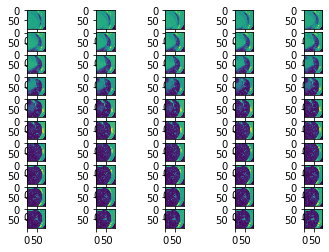

In [156]:
fig = plt.figure()
for i in range(50):
    sliced_scan = scan[:,:,i]
    sliced_scan = np.squeeze(sliced_scan)
    y = fig.add_subplot(10,5,i+1)
    y.imshow(sliced_scan)
plt.show()

In [157]:
print(np.expand_dims(scan,-1).shape)
print(scan.sum(axis=1).shape)

(92, 92, 92, 1)
(92, 92)


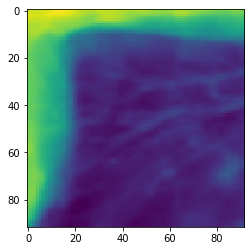

<Figure size 360x360 with 0 Axes>

In [158]:
plt.imshow(scan.sum(axis=1))
plt.figure(figsize=(5,5))
plt.show()

### conv2d model

In [159]:
mypath = 'inputs/images'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
len(onlyfiles)

images = []

for i in range(len(onlyfiles)):
    archive = np.load(f'inputs/images/{onlyfiles[i]}')
    scan = archive['scan']
    images.append(scan)
    
    
y_train = output_train.SurvivalTime

X_train, X_valid, y_train, y_valid = train_test_split(images, y_train, test_size=0.3, random_state=3)
X_train = np.array(X_train)/np.max(X_train)
X_valid = np.array(X_valid)/np.max(X_valid)

In [160]:
def createCnn():
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(92, 92, 92)))
    model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((4, 4)))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((4, 4)))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Dense(1))
    
    return model

model = createModel()
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 90, 90, 32)        26528     
_________________________________________________________________
batch_normalization_86 (Batc (None, 90, 90, 32)        128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
batch_normalization_87 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
batch_normalization_88 (Batc (None, 20, 20, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)        

In [161]:
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size = 4) 

Epoch 1/10
53/53 [==============================] - 7s 130ms/step - loss: 1338805.0000 - root_mean_squared_error: 1157.0674 - val_loss: 1119963.3750 - val_root_mean_squared_error: 1058.2832
Epoch 2/10
53/53 [==============================] - 7s 133ms/step - loss: 1337464.5000 - root_mean_squared_error: 1156.4880 - val_loss: 1118170.6250 - val_root_mean_squared_error: 1057.4359
Epoch 3/10
53/53 [==============================] - 6s 105ms/step - loss: 1336102.3750 - root_mean_squared_error: 1155.8989 - val_loss: 1114039.2500 - val_root_mean_squared_error: 1055.4806
Epoch 4/10
53/53 [==============================] - 6s 121ms/step - loss: 1334470.7500 - root_mean_squared_error: 1155.1930 - val_loss: 1113268.7500 - val_root_mean_squared_error: 1055.1155
Epoch 5/10
53/53 [==============================] - 7s 135ms/step - loss: 1333156.2500 - root_mean_squared_error: 1154.6239 - val_loss: 1115282.8750 - val_root_mean_squared_error: 1056.0696
Epoch 6/10
53/53 [==============================] 

#### processing test images

In [190]:
mypath = 'X_test/images/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
len(onlyfiles)

test_images = []

for i in range(len(onlyfiles)):
    archive = np.load(f'X_test/images/{onlyfiles[i]}')
    scan = archive['scan']
    test_images.append(scan)
    
test_images = test_images/np.max(test_images)

In [191]:
mlp = create_mlp()
cnn = createCnn()

combinedInput = concatenate([mlp.output, cnn.output])

In [192]:
out = Dense(1, activation='linear', name='output_layer')(combinedInput)

merged_model = Model([mlp.input, cnn.input], out)

In [193]:
merged_model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_28_input (InputLayer)    [(None, 92, 92, 92)] 0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 90, 90, 32)   26528       conv2d_28_input[0][0]            
__________________________________________________________________________________________________
batch_normalization_100 (BatchN (None, 90, 90, 32)   128         conv2d_28[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_28 (MaxPooling2D) (None, 22, 22, 32)   0           batch_normalization_100[0][0]    
_______________________________________________________________________________________

In [194]:
merged_model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = merged_model.fit( x=[X_train_ann, X_train], y=y_train, 
                    validation_data=([X_test, X_valid], y_valid), 
                    epochs=10, batch_size=4)

Epoch 1/10
53/53 [==============================] - 7s 130ms/step - loss: 1338057.6250 - root_mean_squared_error: 1156.7444 - val_loss: 1119672.0000 - val_root_mean_squared_error: 1058.1455
Epoch 2/10
53/53 [==============================] - 5s 96ms/step - loss: 1336918.2500 - root_mean_squared_error: 1156.2518 - val_loss: 1119092.5000 - val_root_mean_squared_error: 1057.8717
Epoch 3/10
53/53 [==============================] - 5s 97ms/step - loss: 1335116.3750 - root_mean_squared_error: 1155.4724 - val_loss: 1117071.7500 - val_root_mean_squared_error: 1056.9161
Epoch 4/10
53/53 [==============================] - 5s 99ms/step - loss: 1332486.7500 - root_mean_squared_error: 1154.3339 - val_loss: 1115548.2500 - val_root_mean_squared_error: 1056.1952
Epoch 5/10
53/53 [==============================] - 5s 102ms/step - loss: 1327901.7500 - root_mean_squared_error: 1152.3462 - val_loss: 1112552.1250 - val_root_mean_squared_error: 1054.7759
Epoch 6/10
53/53 [==============================] - 6

In [195]:
yhat_test = merged_model.predict([X_test_M, np.array(test_images)])
yhat_test = yhat_test.flatten()

In [198]:
yhat_test[yhat_test<0] = - yhat_test[yhat_test<0]

In [199]:
yhat_test

array([ 36.31446  , 163.81609  ,   3.9995508,  33.871887 , 125.88187  ,
       106.08431  , 177.81055  ,  24.423286 ,  20.701777 ,  52.296055 ,
       131.7623   ,  58.78358  ,  97.60141  , 137.35338  ,   6.6998134,
        27.097637 ,  69.553566 ,  43.672466 ,  40.906902 , 106.805504 ,
       135.84166  , 154.90494  ,  83.13569  ,  15.266368 , 127.069595 ,
        35.453903 ,  47.549984 ,  61.521282 ,  49.166542 , 141.29631  ,
        51.954285 , 176.91345  ,  83.37256  ,  25.958445 ,  58.848267 ,
        55.778103 ,   2.0429375,  18.346317 ,   0.5412514,  14.926572 ,
        59.788452 , 172.71828  ,  27.99347  ,  96.84274  , 121.85009  ,
        71.48122  ,   6.635228 , 184.41623  , 162.4351   , 109.704185 ,
        40.553467 ,  75.122215 ,  14.36388  ,  59.524002 ,  61.455395 ,
       154.22928  ,   6.346166 ,  21.001902 ,  98.31408  ,   9.41668  ,
        94.46928  ,  52.162197 ,  10.281016 ,  16.268139 , 158.96324  ,
        26.712637 ,  67.99593  ,  10.390328 ,   5.2936687,  81.6

In [ ]:
test_clinic = pd.read_csv("../input/test-csvs/clinical_data.csv")
result = {'PatientID':test_clinic.PatientID, 'SurvivalTime':yhat_test}
submission = pd.DataFrame(data=result, columns = ['PatientID','SurvivalTime'])
submission['Event'] = 'nan'
#submission.to_csv('second.csv', index = False)